In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation

def compare_opt_boxplot(ml, ann, gnn, fig_name, metric, save_path):
    AUC_internal = pd.DataFrame({"ML":ml,
                     "ANN":ann, "GNN":gnn})


    df_melt = pd.melt(AUC_internal.reset_index(), id_vars=['index'], value_vars=AUC_internal.columns)
    df_melt.columns = ['index', 'Model', metric]
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)
    
    stat_results = [wilcoxon(AUC_internal['ML'].astype('float'), AUC_internal['ANN'].astype('float'), alternative="two-sided"),
                    wilcoxon(AUC_internal['ML'].astype('float'), AUC_internal['GNN'].astype('float'), alternative="two-sided"),
                    wilcoxon(AUC_internal['ANN'].astype('float'), AUC_internal['GNN'].astype('float'), alternative="two-sided"),
                    # wilcoxon(AUC_internal['GS'].astype('float'), AUC_internal['FS'].astype('float'), alternative="two-sided")
                   ]
    
    pvalues = [result.pvalue for result in stat_results]
    plotting_parameters = {
        'data':    df_melt,
        'x':       'Model',
        'y':       metric,
        'palette': subcat_palette[1:]
    }
    
    pairs = [('ML', 'ANN'),
             ('ML', 'GNN'),
              ('ANN', 'GNN'),
             # ('GS', 'FS')
            ]
    
    
    sns.set_style("whitegrid")
    plt.figure(figsize = (10,7))
    
    my_colors = {'ML': 'salmon', 
                  'ANN': 'orange', 
                 # 'SS': 'lightgreen',
                 # 'GS': 'lightblue',
                 'GNN': 'lightgreen'}
    
    
    ax = sns.boxplot(x='Model', y=metric, data=df_melt, palette=my_colors, showmeans=True ,meanprops={"marker":"d",
                               "markerfacecolor":"white", 
                               "markeredgecolor":"black",
                              "markersize":"5"})
    
    mean = round(AUC_internal.mean(),3)
    data = np.array(mean)   
    ser = pd.Series(data, index =AUC_internal.columns)
    
    dict_columns = {'Mean':mean,}
    df = pd.DataFrame(dict_columns)
    
    vertical_offset = df["Mean"].median()*0.008
    
    for xtick in ax.get_xticks():
        ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
        horizontalalignment='center',color='k',weight='semibold', fontsize = 15)
    
    
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.configure(text_format="simple")
    annotator.set_pvalues_and_annotate(pvalues)
    
    ax.set_ylabel(metric, fontsize = 12)
    ax.set_xlabel(None)
    ax.set_xticklabels(labels = AUC_internal.columns, fontsize = 12)
    ax.set_title(fig_name,fontsize = 16, weight ='semibold')
    
    plt.savefig(save_path, dpi = 600)
    plt.show()

In [3]:
df_ml = pd.read_csv("./Database/ML_cv_best.csv")
df_ml.rename(columns={"F1_record": "ML_F1_record"}, inplace=True)
df_ml.rename(columns={"AP_record": "ML_AP_record"}, inplace=True)

df_ann = pd.read_csv("./Database/ANN_cv_best.csv")
df_ann.rename(columns={"F1_record": "ANN_F1_record"}, inplace=True)
df_ann.rename(columns={"AP_record": "ANN_AP_record"}, inplace=True)

df_gnn = pd.read_csv("./Database/record_gnn.csv", index_col = 0)
df_gnn.rename(columns={"F1_record": "GNN_F1_record"}, inplace=True)
df_gnn.rename(columns={"AP_record": "GNN_AP_record"}, inplace=True)

df_record = pd.concat([df_ml,df_ann,df_gnn],axis = 1)


ML vs. ANN: Custom statistical test, P_val:5.699e-01
ANN vs. GNN: Custom statistical test, P_val:9.313e-09
ML vs. GNN: Custom statistical test, P_val:5.588e-09


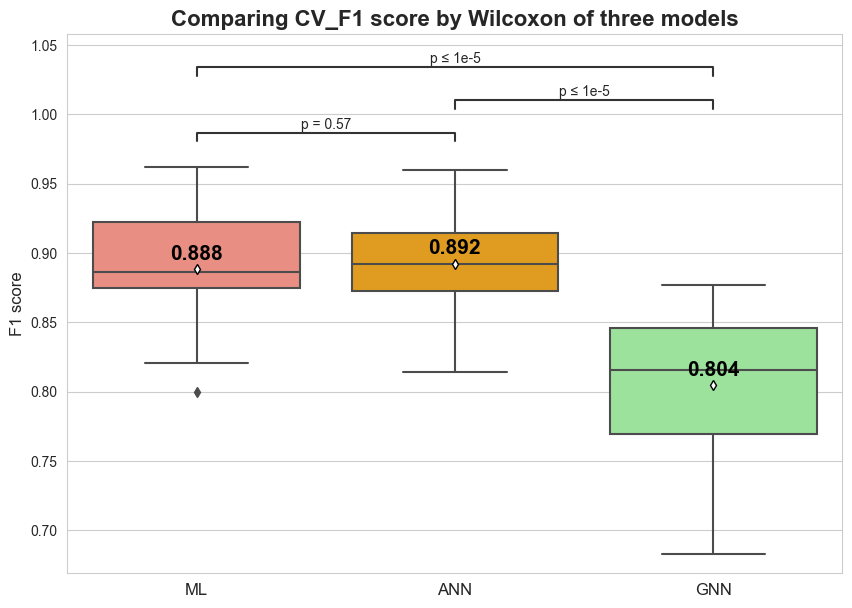

ML vs. ANN: Custom statistical test, P_val:9.838e-01
ANN vs. GNN: Custom statistical test, P_val:1.863e-09
ML vs. GNN: Custom statistical test, P_val:2.552e-07


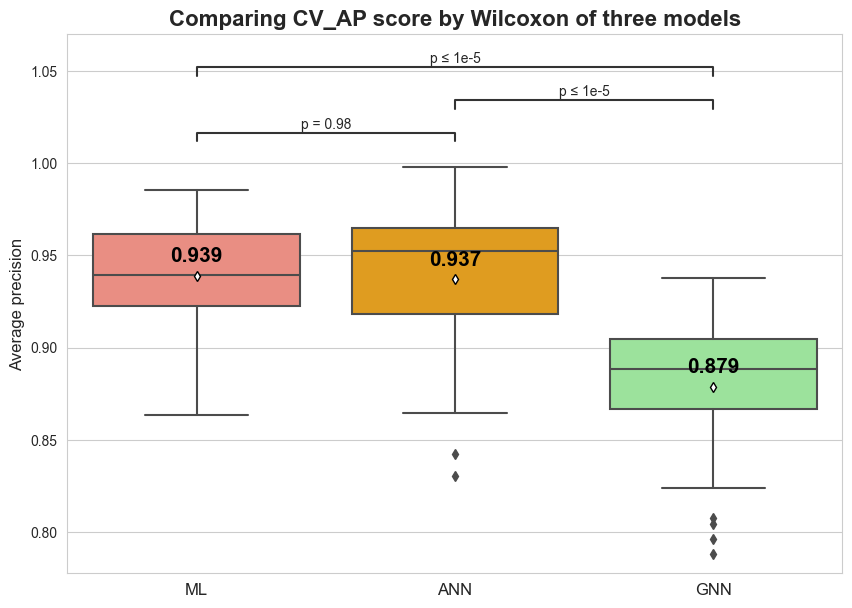

In [4]:

f1_path = "./Database/3_models_f1_score_compare.png"
compare_opt_boxplot(ml = df_record["ML_F1_record"], ann = df_record["ANN_F1_record"], gnn = df_record["GNN_F1_record"], 
                    fig_name ="Comparing CV_F1 score by Wilcoxon of three models" , metric = "F1 score", save_path=f1_path)

ap_path = "./Database/3_models_ap_score_compare.png"
compare_opt_boxplot(ml = df_record["ML_AP_record"], ann = df_record["ANN_AP_record"], gnn = df_record["GNN_AP_record"], 
                    fig_name ="Comparing CV_AP score by Wilcoxon of three models" ,metric = "Average precision", save_path=ap_path)